In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, SVMSMOTE, BorderlineSMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef

In [2]:
# Outlining possible null values in the dataset
null_datasets = ['Na','n/a','NAN','NA','/','?']
# loading the datasets and replacing all possible null-value with null-value recognized by dropna
df1 = pd.read_csv('ashrae_db2.01.csv', na_values=null_datasets, low_memory=False)
df1.columns

Index(['Publication (Citation)', 'Data contributor', 'Year', 'Season',
       'Koppen climate classification', 'Climate', 'City', 'Country',
       'Building type', 'Cooling startegy_building level',
       'Cooling startegy_operation mode for MM buildings',
       'Heating strategy_building level', 'Age', 'Sex', 'Thermal sensation',
       'Thermal sensation acceptability', 'Thermal preference',
       'Air movement acceptability', 'Air movement preference',
       'Thermal comfort', 'PMV', 'PPD', 'SET', 'Clo', 'Met', 'activity_10',
       'activity_20', 'activity_30', 'activity_60', 'Air temperature (C)',
       'Air temperature (F)', 'Ta_h (C)', 'Ta_h (F)', 'Ta_m (C)', 'Ta_m (F)',
       'Ta_l (C)', 'Ta_l (F)', 'Operative temperature (C)',
       'Operative temperature (F)', 'Radiant temperature (C)',
       'Radiant temperature (F)', 'Globe temperature (C)',
       'Globe temperature (F)', 'Tg_h (C)', 'Tg_h (F)', 'Tg_m (C)', 'Tg_m (F)',
       'Tg_l (C)', 'Tg_l (F)', 'Relative humi

In [3]:
df2 = df1[['Air temperature (F)','Relative humidity (%)','Clo','Air velocity (m/s)',
          'Radiant temperature (F)', 'Met','Thermal sensation']]
df2.columns = ['T_air','RH','Clo','V_air', 'Rad_Temp','Met','TS']
df2.head()
df3 = df2.dropna()
#converting the relevant columns to float and integer
df4 = df3.astype({'T_air':'float','RH':'float','Clo':'float','V_air':'float', 'Rad_Temp':'float','Met':'float','TS':'int'})


In [4]:
#input variable
X = df4[['T_air','RH','Clo','V_air', 'Rad_Temp','Met']]
#output variable which is what we are predicting i.e Thermal Sensation
y = df4.TS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)
model.feature_importances_

array([0.18505192, 0.19922321, 0.18661156, 0.13886813, 0.18227286,
       0.10797232])

<BarContainer object of 6 artists>

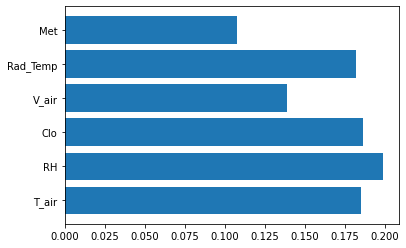

In [5]:
plt.barh(X.columns,model.feature_importances_)

Based on the Random Forest feature importance, I will be going with T_air, RH, Clo, and V_air. I left out Rad_Temp because it has almost the same feature importance as T_air, and both are temperature measurements. 